Implementation is mainly inspired by this resource: 
https://www.kaggle.com/code/nikhilkohli/stock-prediction-using-linear-regression-starter

In [1]:
import pandas as pd
import numpy as np
# Load local .csv file as DataFrame
df = pd.read_csv('merged_data.csv')

In [2]:
# Reindex data using a DatetimeIndex
df.set_index('Date', inplace=True)

In [3]:
def create_train_test_set(df_Stock):
    
    features = df.drop(columns=['Close', 'Open', 'High', 'Low'], axis=1)
    target = df['Close']
    
    data_len = df.shape[0]
    print('Historical Stock Data length is - ', str(data_len))

    #create a chronological split for train and testing
    train_split = int(data_len * 0.8)
    print('Training Set length - ', str(train_split))

    print('Test Set length - ', str(int(data_len * 0.2)))

    # Splitting features and target into train, validation and test samples 
    X_train, X_test = features[:train_split], features[train_split:]
    Y_train, Y_test = target[:train_split], target[train_split:]

    #print shape of samples
    print(X_train.shape, X_test.shape)
    print(Y_train.shape, Y_test.shape)
    
    return X_train, X_test, Y_train, Y_test

In [4]:
X_train, X_test, Y_train, Y_test = create_train_test_set(df)

Historical Stock Data length is -  1970
Training Set length -  1576
Test Set length -  394
(1576, 29) (394, 29)
(1576,) (394,)


In [5]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
model = lr.fit(X_train, Y_train)
#model = sm.OLS(X_train, Y_train).fit()
model

LinearRegression()

In [6]:
Y_train_pred = lr.predict(X_train)
Y_test_pred = lr.predict(X_test)

In [7]:
from sklearn import metrics
print("Training RMSE: ",round(np.sqrt(metrics.mean_squared_error(Y_train,Y_train_pred)),2))

print(' ')

print("Test RMSE: ",round(np.sqrt(metrics.mean_squared_error(Y_test,Y_test_pred)),2))

Training RMSE:  0.16
 
Test RMSE:  0.52


In [8]:
df_pred = pd.DataFrame(Y_test)
df_pred['Predicted'] = Y_test_pred
df_pred = df_pred.reset_index()
df_pred.loc[:, 'Date'] = pd.to_datetime(df_pred['Date'],format='%Y-%m-%d')
df_pred

C:\Users\jz\AppData\Local\Temp\ipykernel_24768\103821760.py:4: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_pred.loc[:, 'Date'] = pd.to_datetime(df_pred['Date'],format='%Y-%m-%d')


,Date,Close,Predicted
0,2021-03-18,50.570000,50.626361
1,2021-03-19,50.810001,50.726658
2,2021-03-22,51.000000,51.053385
3,2021-03-23,51.389999,51.465105
4,2021-03-24,51.520000,51.703904
...,...,...,...
389,2022-12-22,63.340000,64.660054
390,2022-12-23,63.820000,65.204359
391,2022-12-28,63.570000,65.032692
392,2022-12-29,63.950001,65.406386


<AxesSubplot:>

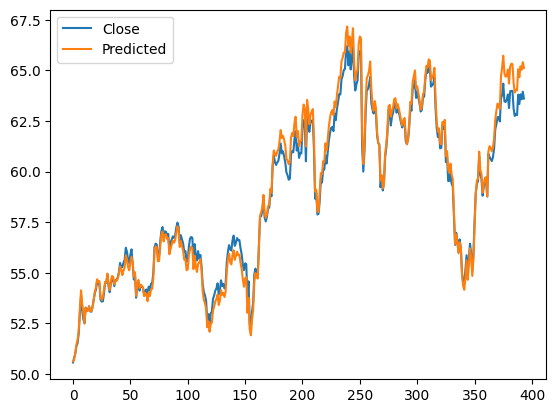

In [9]:
df_pred[['Close', 'Predicted']].plot()

# Test for Gauss-Markov (GM) assumptions

Shapiro-Wilk test statistic: 0.9810774326324463
p-value: 4.965793414157815e-05


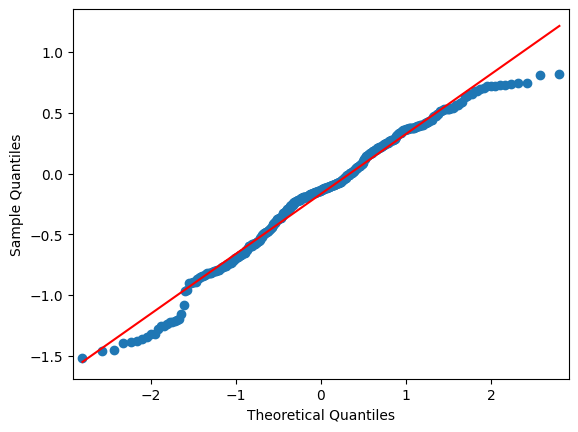

Breusch-Pagan test statistic: 337.0038508907213
p-value: 1.0156999095911353e-54


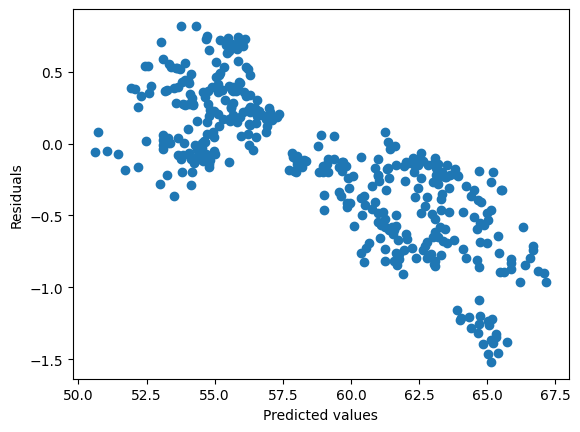

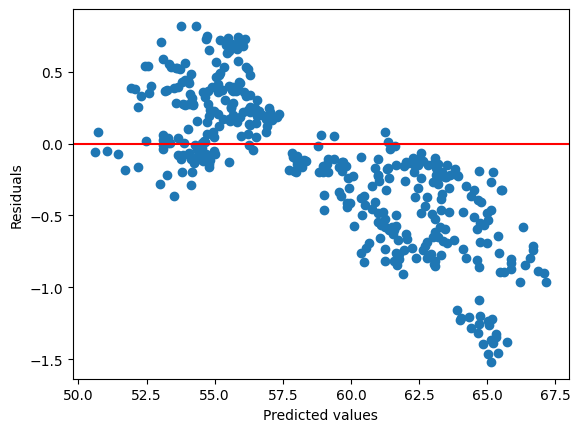

In [10]:
import statsmodels.api as sm
import scipy.stats as stats
import matplotlib.pyplot as plt

# Calculate the residuals
train_preds = model.predict(X_train)
test_preds = model.predict(X_test)
train_resid = Y_train - train_preds
test_resid = Y_test - test_preds

# Test for NORMALITY using the Shapiro-Wilk test
stat, p = stats.shapiro(test_resid)
print("Shapiro-Wilk test statistic:", stat)
print("p-value:", p)

# Check the NORMALITY of the residuals using a Q-Q plot
sm.qqplot(test_resid, line="s")
plt.show()

# Test for HOMOSKEDASTICITY using the Breusch-Pagan test
bp_test = sm.stats.diagnostic.het_breuschpagan(test_resid, X_test)
print("Breusch-Pagan test statistic:", bp_test[0])
print("p-value:", bp_test[1])

# Check HOMOSKEDASTICITY using a scatter plot of the residuals vs. the predicted values
plt.scatter(test_preds, test_resid)
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.show()

# Check the LINEARITY of the relationship using a scatter plot of the residuals vs. the predicted values
plt.scatter(test_preds, test_resid)
plt.axhline(y=0, color="r", linestyle="-")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.show()